# 01. 데이터 분석 프로세스
- 주제 선정 > 데이터 수집 > 데이터 처리 > 데이터 분석 > 정보 도출

# 02. 데이터 획득, 처리, 시각화 심화

## 데이터에서 결측치 확인 및 처리

In [1]:
import pandas as pd

data = {'제품1':[250.0, 200.0, 150.0, 120.0, None],
        '제품2':[150, 160, 200, 230, 250],
        '제품3':[None, 170.0, 100.0, 130.0, 140.0],
        '제품4':[None, None, 150.0, 170.0, None]}
index = pd.Index([2015, 2016, 2017, 2018, 2019], name='연도')
df = pd.DataFrame(data, index=index)
df

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,NaN,NaN
2016,200.0,160,170.0,NaN
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0
2019,NaN,250,140.0,NaN


### 결측치 확인
- `isnull()` 또는 `isna()`

In [2]:
df.isna()

,제품1,제품2,제품3,제품4
연도,,,,
2015,False,False,True,True
2016,False,False,False,True
2017,False,False,False,False
2018,False,False,False,False
2019,True,False,False,True


In [3]:
df.isna().sum()

제품1    1
제품2    0
제품3    1
제품4    3
dtype: int64

### 결측치 제거
- `drop()` 또는 `dropna()`

In [4]:
# 행 제거
df.drop(index=[2019])

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,NaN,NaN
2016,200.0,160,170.0,NaN
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0


In [5]:
# 열 제거
df.drop(columns=['제품3', '제품4'])

,제품1,제품2
연도,,
2015,250.0,150
2016,200.0,160
2017,150.0,200
2018,120.0,230
2019,NaN,250


In [6]:
# 행, 열 동시 제거
df.drop(index=[2018, 2019], columns=['제품3', '제품4'])

,제품1,제품2
연도,,
2015,250.0,150
2016,200.0,160
2017,150.0,200


In [7]:
# 결측치 행 모두 제거
df.dropna() # df.dropna(axis=0)

,제품1,제품2,제품3,제품4
연도,,,,
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0


In [9]:
# 특정 열에 대한 결측치가 있는 행만 제거
df.dropna(axis=0, subset=['제품1'])

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,NaN,NaN
2016,200.0,160,170.0,NaN
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0


In [10]:
# 결측치 열 모두 제거
df.dropna(axis=1)

,제품2
연도,
2015,150
2016,160
2017,200
2018,230
2019,250


In [11]:
# 특정 행에 대한 결측치가 있는 열만 제거
df.dropna(axis=1, subset=[2015])

,제품1,제품2
연도,,
2015,250.0,150
2016,200.0,160
2017,150.0,200
2018,120.0,230
2019,NaN,250


### 결측치 채우기
- `fillna()` 또는 imputer 사용

In [12]:
# 모든 결측치를 한 값으로 채우기
df.fillna(0)

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,0.0,0.0
2016,200.0,160,170.0,0.0
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0
2019,0.0,250,140.0,0.0


In [13]:
# 열의 다음 값 채우기
df.fillna(method='bfill')

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,170.0,150.0
2016,200.0,160,170.0,150.0
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0
2019,NaN,250,140.0,NaN


In [14]:
# 열의 이전 값 채우기
df.fillna(method='ffill')

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,NaN,NaN
2016,200.0,160,170.0,NaN
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0
2019,120.0,250,140.0,170.0


In [15]:
# 지정한 열의 결측치만 특정한 값으로 채우기
values = {'제품1':100, '제품4':400}
df.fillna(value=values)

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,NaN,400.0
2016,200.0,160,170.0,400.0
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0
2019,100.0,250,140.0,400.0


In [17]:
# imputer 사용하기 (각 열마다의 평균/중앙값/최빈값으로 채움)
from sklearn.impute import SimpleImputer

X = df.values
columns = df.columns
index = df.index

In [18]:
# 평균
imputer1 = SimpleImputer(strategy='mean')

pd.DataFrame(data=imputer1.fit_transform(X), columns=columns, index=index)

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150.0,135.0,160.0
2016,200.0,160.0,170.0,160.0
2017,150.0,200.0,100.0,150.0
2018,120.0,230.0,130.0,170.0
2019,180.0,250.0,140.0,160.0


In [19]:
# 중앙값
imputer2 = SimpleImputer(strategy='median')

pd.DataFrame(data=imputer2.fit_transform(X), columns=columns, index=index)

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150.0,135.0,160.0
2016,200.0,160.0,170.0,160.0
2017,150.0,200.0,100.0,150.0
2018,120.0,230.0,130.0,170.0
2019,175.0,250.0,140.0,160.0


In [21]:
# 최빈값
imputer3 = SimpleImputer(strategy='most_frequent')

pd.DataFrame(data=imputer3.fit_transform(X), columns=columns, index=index)

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150.0,100.0,150.0
2016,200.0,160.0,170.0,150.0
2017,150.0,200.0,100.0,150.0
2018,120.0,230.0,130.0,170.0
2019,120.0,250.0,140.0,150.0


## 데이터의 요약 및 재구성

### 데이터의 구조 살펴보기

In [22]:
data = {'매장명':['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'],
        '제품종류':['스마트폰', '스마트폰', 'TV', '스마트폰', '스마트폰', 'TV', '스마트폰', 'TV', 'TV'],
        '모델명':['S1', 'S2', 'V1', 'S2', 'S1', 'V1', 'S2', 'V1', 'V2'],
        '판매':[1, 2, 3, 4, 5, 6, 2, 3, 7],
        '재고':[2, 5, 5, 6, 8, 9, 4, 6, 9]}

df_sales = pd.DataFrame(data)
df_sales

,매장명,제품종류,모델명,판매,재고
0,A,스마트폰,S1,1,2
1,A,스마트폰,S2,2,5
2,A,TV,V1,3,5
3,B,스마트폰,S2,4,6
4,B,스마트폰,S1,5,8
5,B,TV,V1,6,9
6,C,스마트폰,S2,2,4
7,C,TV,V1,3,6
8,C,TV,V2,7,9


In [23]:
# 데이터 구조
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   매장명     9 non-null      object
 1   제품종류    9 non-null      object
 2   모델명     9 non-null      object
 3   판매      9 non-null      int64 
 4   재고      9 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 488.0+ bytes


In [25]:
# 데이터 값의 개수
df_sales['매장명'].value_counts()

B    3
A    3
C    3
Name: 매장명, dtype: int64

In [26]:
df_sales['제품종류'].value_counts()

스마트폰    5
TV      4
Name: 제품종류, dtype: int64

### 피벗 테이블로 데이터 재구성하기

In [27]:
df_sales.pivot_table(index=['매장명', '제품종류', '모델명'],
                     values=['판매', '재고'], aggfunc='sum')

재고  판매
매장명 제품종류 모델명        
A   TV   V1    5   3
    스마트폰 S1    2   1
         S2    5   2
B   TV   V1    9   6
    스마트폰 S1    8   5
         S2    6   4
C   TV   V1    6   3
         V2    9   7
    스마트폰 S2    4   2

In [29]:
df_sales.pivot_table(index=['매장명'], columns=['제품종류'],
                     values=['판매', '재고'], aggfunc='sum')

재고       판매     
제품종류  TV 스마트폰  TV 스마트폰
매장명                   
A      5    7   3    3
B      9   14   6    9
C     15    4  10    2

In [30]:
df_sales.pivot_table(index=['매장명'], columns=['제품종류'],
                     values=['판매', '재고'], aggfunc='count')

재고      판매     
제품종류 TV 스마트폰 TV 스마트폰
매장명                 
A     1    2  1    2
B     1    2  1    2
C     2    1  2    1

# 03. 실전 데이터(서울시 업무추진비) 분석

## 데이터 분석의 주제 선정
- 연도별 추이 분석
- 월별 집행금액 분석
- 부서별 집행 내역 분석
- 요일별 및 시간대별 집행 내역 분석

## 데이터 수집
- https://github.com/seoul-opengov/opengov

In [31]:
import requests
import os
import pathlib

def get_seoul_expense_list(extension, year, data_folder):
    """
    extension : 확장자, ['csv', 'json', 'xml', 'xlsx']
    year : 연도, [2017, 2018, 2019, 2020, 2021]
    data_folder : 내려받을 폴더
    """
    # 깃허브 데이터 위치 지정
    expense_list_year_url = 'https://github.com/seoul-opengov/opengov/raw/master/expense_list' + str(year) + '/'
    
    # 데이터를 내려받을 폴더 지정
    expense_list_year_dir = data_folder + str(year) + '/'
    
    # 내려받을 폴더가 없다면 폴더 생성
    if os.path.isdir(expense_list_year_dir):
        print('데이터 폴더({0})가 이미 있습니다. {0}년 데이터의 다운로드를 시작합니다.'.format(year))
    else:
        print('데이터 폴더({0})가 없어서 생성했습니다. {0}년 데이터의 다운로드를 시작합니다.'.format(year))
        pathlib.Path(expense_list_year_dir).mkdir(parents=True, exist_ok=True)
        
    # 지정한 폴더로 1~12월 업무 추진비 파일 다운로드
    for k in range(12):
        file_name = f'{year}{k+1:02d}_expense_list.{extension}'
        url = expense_list_year_url + file_name
        print(url)
        r = requests.get(url)
        with open(expense_list_year_dir + file_name, 'wb') as f:
            f.write(r.content)

In [32]:
extension = 'csv'
years = [2017, 2018, 2019, 2020]
data_folder = 'data/'

for year in years:
    get_seoul_expense_list(extension, year, data_folder)

데이터 폴더(2017)가 없어서 생성했습니다. 2017년 데이터의 다운로드를 시작합니다.
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201701_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201702_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201703_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201704_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201705_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201706_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201707_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201708_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201709_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201710_expense_list.csv
https://github.com/s

In [33]:
import glob

for year in years:
    path_name = data_folder + str(year) + '/'
    
    file_name_for_glob = path_name + '*list.csv'
    
    csv_files = []
    for csv_file in glob.glob(file_name_for_glob):
        csv_files.append(csv_file.split('\\')[-1])
    
    print('[폴더 이름]', path_name)
    print('* CSV 파일 :', csv_files)

[폴더 이름] data/2017/
* CSV 파일 : ['201701_expense_list.csv', '201702_expense_list.csv', '201703_expense_list.csv', '201704_expense_list.csv', '201705_expense_list.csv', '201706_expense_list.csv', '201707_expense_list.csv', '201708_expense_list.csv', '201709_expense_list.csv', '201710_expense_list.csv', '201711_expense_list.csv', '201712_expense_list.csv']
[폴더 이름] data/2018/
* CSV 파일 : ['201801_expense_list.csv', '201802_expense_list.csv', '201803_expense_list.csv', '201804_expense_list.csv', '201805_expense_list.csv', '201806_expense_list.csv', '201807_expense_list.csv', '201808_expense_list.csv', '201809_expense_list.csv', '201810_expense_list.csv', '201811_expense_list.csv', '201812_expense_list.csv']
[폴더 이름] data/2019/
* CSV 파일 : ['201901_expense_list.csv', '201902_expense_list.csv', '201903_expense_list.csv', '201904_expense_list.csv', '201905_expense_list.csv', '201906_expense_list.csv', '201907_expense_list.csv', '201908_expense_list.csv', '201909_expense_list.csv', '201910_expense_

## 데이터 처리

### 데이터의 구조 및 결측치 살펴보기

In [34]:
import pandas as pd

expense_list2017_dir = 'data/2017/'
file_name = '201701_expense_list.csv'

df = pd.read_csv(expense_list2017_dir + file_name)

In [35]:
df.head(2)

,nid,title,url,dept_nm_lvl_1,dept_nm_lvl_2,dept_nm_lvl_3,dept_nm_lvl_4,dept_nm_lvl_5,exec_yr,exec_month,expense_budget,expense_execution,category,dept_nm_full,exec_dt,exec_loc,exec_purpose,target_nm,payment_method,exec_amount
0,11430252,2017년 1월 장애인복지정책과 업무추진비 집행내역,http://opengov.seoul.go.kr/public/11430252,서울시본청,복지본부,장애인복지정책과,NaN,NaN,2017,1,NaN,NaN,NaN,복지본부 장애인복지정책과,2017-01-26 13:10,동해일식 (중구 무교동),기본소득과 장애인복지 논의간담회,장애인복지정책팀장 외 2명,카드,76000
1,11430252,2017년 1월 장애인복지정책과 업무추진비 집행내역,http://opengov.seoul.go.kr/public/11430252,서울시본청,복지본부,장애인복지정책과,NaN,NaN,2017,1,NaN,NaN,NaN,복지본부 장애인복지정책과,2017-01-25 22:41,김앤장 (중구 무교로),장애인단체 활동지원 논의간담회,장애인복지정책과장 외 3명,카드,102000


In [36]:
# 2017년 전체 데이터
year = 2017
expense_list_year_dir = 'data/' + str(year) + '/'

df_year = pd.DataFrame()

for k in range(12):
    file_name = f'{year}{k+1:02d}_expense_list.csv'
    
    df_month = pd.read_csv(expense_list_year_dir + file_name)
    
    # df_year에 df_month 추가
    df_year = df_year.append(df_month, ignore_index=True)

In [37]:
df_year.head(2)

,nid,title,url,dept_nm_lvl_1,dept_nm_lvl_2,dept_nm_lvl_3,dept_nm_lvl_4,dept_nm_lvl_5,exec_yr,exec_month,expense_budget,expense_execution,category,dept_nm_full,exec_dt,exec_loc,exec_purpose,target_nm,payment_method,exec_amount
0,11430252,2017년 1월 장애인복지정책과 업무추진비 집행내역,http://opengov.seoul.go.kr/public/11430252,서울시본청,복지본부,장애인복지정책과,NaN,NaN,2017,1,NaN,NaN,NaN,복지본부 장애인복지정책과,2017-01-26 13:10,동해일식 (중구 무교동),기본소득과 장애인복지 논의간담회,장애인복지정책팀장 외 2명,카드,76000
1,11430252,2017년 1월 장애인복지정책과 업무추진비 집행내역,http://opengov.seoul.go.kr/public/11430252,서울시본청,복지본부,장애인복지정책과,NaN,NaN,2017,1,NaN,NaN,NaN,복지본부 장애인복지정책과,2017-01-25 22:41,김앤장 (중구 무교로),장애인단체 활동지원 논의간담회,장애인복지정책과장 외 3명,카드,102000


In [38]:
df_year.tail(2)

,nid,title,url,dept_nm_lvl_1,dept_nm_lvl_2,dept_nm_lvl_3,dept_nm_lvl_4,dept_nm_lvl_5,exec_yr,exec_month,expense_budget,expense_execution,category,dept_nm_full,exec_dt,exec_loc,exec_purpose,target_nm,payment_method,exec_amount
70130,14292506,2017년 12월 사업소_은평병원_원무과 업무추진비 내역,http://opengov.seoul.go.kr/public/14292506,사업소,은평병원,원무과,NaN,NaN,2017,12,NaN,NaN,NaN,원무과,2017-12-05 18:21,삿뽀로(서오릉로 4),인증 관련업무 직원 격려 간담회,병원장 외 33명,카드,820000
70131,14292506,2017년 12월 사업소_은평병원_원무과 업무추진비 내역,http://opengov.seoul.go.kr/public/14292506,사업소,은평병원,원무과,NaN,NaN,2017,12,NaN,NaN,NaN,원무과,2017-12-06 18:00,스타벅스(응암동 96-1),전문의 및 전공의 격려 다과회,병원장 외 11명,카드,440000


In [39]:
df_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70132 entries, 0 to 70131
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nid                70132 non-null  int64  
 1   title              70132 non-null  object 
 2   url                70132 non-null  object 
 3   dept_nm_lvl_1      70132 non-null  object 
 4   dept_nm_lvl_2      70074 non-null  object 
 5   dept_nm_lvl_3      61262 non-null  object 
 6   dept_nm_lvl_4      17939 non-null  object 
 7   dept_nm_lvl_5      3474 non-null   object 
 8   exec_yr            70132 non-null  int64  
 9   exec_month         70132 non-null  int64  
 10  expense_budget     3108 non-null   float64
 11  expense_execution  2805 non-null   float64
 12  category           1259 non-null   object 
 13  dept_nm_full       70053 non-null  object 
 14  exec_dt            70132 non-null  object 
 15  exec_loc           69360 non-null  object 
 16  exec_purpose       701

In [40]:
df_year.isna().sum()

nid                      0
title                    0
url                      0
dept_nm_lvl_1            0
dept_nm_lvl_2           58
dept_nm_lvl_3         8870
dept_nm_lvl_4        52193
dept_nm_lvl_5        66658
exec_yr                  0
exec_month               0
expense_budget       67024
expense_execution    67327
category             68873
dept_nm_full            79
exec_dt                  0
exec_loc               772
exec_purpose            22
target_nm              535
payment_method         203
exec_amount              0
dtype: int64

In [41]:
# 필요 없음, 결측치가 많은 열 제거
df_year_drop = df_year.drop(columns=['nid', 'url', 'dept_nm_lvl_3', 'dept_nm_lvl_4', 'dept_nm_lvl_5', 'expense_budget', 'expense_execution', 'category'])
df_year_drop.head(2)

,title,dept_nm_lvl_1,dept_nm_lvl_2,exec_yr,exec_month,dept_nm_full,exec_dt,exec_loc,exec_purpose,target_nm,payment_method,exec_amount
0,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-26 13:10,동해일식 (중구 무교동),기본소득과 장애인복지 논의간담회,장애인복지정책팀장 외 2명,카드,76000
1,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-25 22:41,김앤장 (중구 무교로),장애인단체 활동지원 논의간담회,장애인복지정책과장 외 3명,카드,102000


In [43]:
# 저장
year = 2017
expense_list_year_dir = 'data/' + str(year) + '/'

expense_list_tidy_file = f'{year}_expense_list_tidy.csv'
df_year_drop.to_csv(expense_list_year_dir + expense_list_tidy_file, index=False)

In [8]:
# 위 과정을 함수로 만들어 2017~2020년 반복
def select_columns_save_file(year, data_folder, drop_columns_list):
    
    expense_list_year_dir = data_folder + str(year) + '/'
    expense_list_tidy_file = f'{year}_expense_list_tidy.csv'
    
    df_year = pd.DataFrame()
    for k in range(12):
        file_name = f'{year}{k+1:02d}_expense_list.csv'

        df_month = pd.read_csv(expense_list_year_dir + file_name)

        # df_year에 df_month 추가
        df_year = df_year.append(df_month, ignore_index=True)
        
    df_year_drop = df_year.drop(columns=drop_columns_list)
    if 'bimok' in df_year.columns:
        df_year_drop = df_year_drop.drop(columns=['bimok'])
    new_file_name = expense_list_year_dir + expense_list_tidy_file
    df_year_drop.to_csv(new_file_name, index=False)
    
    print('==> {} 파일을 생성했습니다.'.format(expense_list_tidy_file))

In [9]:
data_folder = 'data/'
years = [2017, 2018, 2019, 2020]
drop_columns_list = ['nid', 'url', 'dept_nm_lvl_3', 'dept_nm_lvl_4', 'dept_nm_lvl_5', 'expense_budget', 'expense_execution', 'category']

for year in years:
    print(f'{year}년 데이터를 정리해서 저장하고 있습니다.')
    select_columns_save_file(year, data_folder, drop_columns_list)
print('모든 연도의 데이터를 정리해서 파일로 저장했습니다.')

2017년 데이터를 정리해서 저장하고 있습니다.
==> 2017_expense_list_tidy.csv 파일을 생성했습니다.
2018년 데이터를 정리해서 저장하고 있습니다.
==> 2018_expense_list_tidy.csv 파일을 생성했습니다.
2019년 데이터를 정리해서 저장하고 있습니다.
==> 2019_expense_list_tidy.csv 파일을 생성했습니다.
2020년 데이터를 정리해서 저장하고 있습니다.
==> 2020_expense_list_tidy.csv 파일을 생성했습니다.
모든 연도의 데이터를 정리해서 파일로 저장했습니다.


## 데이터 분석

In [15]:
import pandas as pd

data_folder = 'data/'
years = [2017, 2018, 2019, 2020]

df_expense_all = pd.DataFrame()

for year in years:
    expense_list_year_dir = data_folder + str(year) + '/'
    expense_list_tidy_file = f'{year}_expense_list_tidy.csv'
    
    path_file_name = expense_list_year_dir + expense_list_tidy_file
    df_expense = pd.read_csv(path_file_name)
    print(year, df_expense.columns)
    df_expense_all = df_expense_all.append(df_expense, ignore_index=True)

2017 Index(['title', 'dept_nm_lvl_1', 'dept_nm_lvl_2', 'exec_yr', 'exec_month',
       'dept_nm_full', 'exec_dt', 'exec_loc', 'exec_purpose', 'target_nm',
       'payment_method', 'exec_amount'],
      dtype='object')
2018 Index(['title', 'dept_nm_lvl_1', 'dept_nm_lvl_2', 'exec_yr', 'exec_month',
       'dept_nm_full', 'exec_dt', 'exec_loc', 'exec_purpose', 'target_nm',
       'payment_method', 'exec_amount'],
      dtype='object')
2019 Index(['title', 'dept_nm_lvl_1', 'dept_nm_lvl_2', 'exec_yr', 'exec_month',
       'dept_nm_full', 'exec_dt', 'exec_loc', 'exec_purpose', 'target_nm',
       'payment_method', 'exec_amount'],
      dtype='object')
2020 Index(['title', 'dept_nm_lvl_1', 'dept_nm_lvl_2', 'exec_yr', 'exec_month',
       'dept_nm_full', 'exec_dt', 'exec_loc', 'exec_purpose', 'target_nm',
       'payment_method', 'exec_amount'],
      dtype='object')


In [16]:
df_expense_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287419 entries, 0 to 287418
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   title           287419 non-null  object
 1   dept_nm_lvl_1   287419 non-null  object
 2   dept_nm_lvl_2   287135 non-null  object
 3   exec_yr         287419 non-null  int64 
 4   exec_month      287419 non-null  int64 
 5   dept_nm_full    287340 non-null  object
 6   exec_dt         287419 non-null  object
 7   exec_loc        284679 non-null  object
 8   exec_purpose    287397 non-null  object
 9   target_nm       286023 non-null  object
 10  payment_method  287216 non-null  object
 11  exec_amount     287419 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 26.3+ MB


In [17]:
df_expense_all.head(2)

,title,dept_nm_lvl_1,dept_nm_lvl_2,exec_yr,exec_month,dept_nm_full,exec_dt,exec_loc,exec_purpose,target_nm,payment_method,exec_amount
0,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-26 13:10,동해일식 (중구 무교동),기본소득과 장애인복지 논의간담회,장애인복지정책팀장 외 2명,카드,76000
1,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-25 22:41,김앤장 (중구 무교로),장애인단체 활동지원 논의간담회,장애인복지정책과장 외 3명,카드,102000


In [18]:
df_expense_all.tail(2)

,title,dept_nm_lvl_1,dept_nm_lvl_2,exec_yr,exec_month,dept_nm_full,exec_dt,exec_loc,exec_purpose,target_nm,payment_method,exec_amount
287417,2020년 12월 사업소 물재생센터 난지물재생센터 시설보수과 업무추진비 - 부서운영,사업소,물재생센터,2020,12,물순환안전국 난지물재생센터 시설보수과,2020-12-28 15:18,강서농협하나로마트,탕비용품 구매,조선행과장외 22명,카드,687700
287418,2020년 12월 사업소 물재생센터 난지물재생센터 시설보수과 업무추진비 - 부서운영,사업소,물재생센터,2020,12,물순환안전국 난지물재생센터 시설보수과,2020-12-02 16:05,다농마트,탕비용품 구매,조선행과장외 22명,카드,415430


### 연도별 추이 분석

In [19]:
year_expense = df_expense_all['exec_yr'].value_counts()
year_expense

2019    74207
2018    72218
2020    70862
2017    70132
Name: exec_yr, dtype: int64

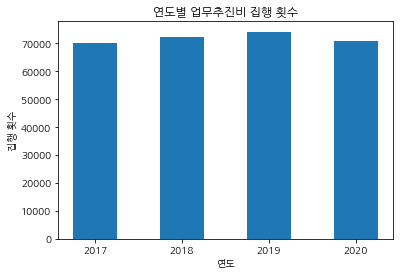

In [21]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False

plt.bar(year_expense.index, year_expense.values, tick_label = year_expense.index, width=0.5)
plt.title('연도별 업무추진비 집행 횟수')
plt.xlabel('연도')
plt.ylabel('집행 횟수')
plt.show()

In [22]:
# 집행연도별 집행금액의 합
year_total = pd.pivot_table(data=df_expense_all, index=['exec_yr'], values=['exec_amount'], aggfunc=sum)
year_total

,exec_amount
exec_yr,
2017,9076941387
2018,9937556542
2019,10532330632
2020,9808440264


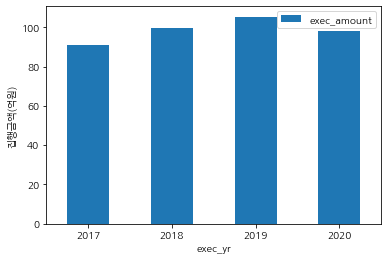

In [23]:
eok_won = 100000000 # 1억원
(year_total / eok_won).plot.bar(rot=0) # xtick 회전 각도
plt.ylabel('집행금액(억원)')
plt.show()

코로나로 인해 업무추진비가 줄었다? > 2021년까지 확인할 필요가 있음

In [24]:
# 연도별 집행금액의 평균이 같은지 확인
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'exec_amount ~ C(exec_yr)'
anova = ols(formula, df_expense_all).fit()
result = anova_lm(anova)
result

,df,sum_sq,mean_sq,F,PR(>F)
C(exec_yr),3.0,5.994456e+12,1.998152e+12,29.744559,3.221709e-19
Residual,287415.0,1.930769e+16,6.717706e+10,NaN,NaN


p-value가 매우 작으므로 귀무가설(연도별 집행 금액의 평균은 같다) 기각 >>> 연도별로 집행 금액의 평균은 다르다.

In [32]:
year_total['exec_amount'] / year_expense

2017    129426.529787
2018    137604.981334
2019    141931.766976
2020    138416.080043
dtype: float64

### 월별 집행금액 분석

In [33]:
month_total = pd.pivot_table(df_expense_all, index=['exec_month'], values=['exec_amount'], aggfunc=sum)
month_total

,exec_amount
exec_month,
1,3105200774
2,3010666725
3,2976733384
4,2906218409
5,2834685928
6,3138670367
7,3193307694
8,2743547566
9,3193964626


In [35]:
# 연도별, 월별 집행금액
year_month_total = pd.pivot_table(df_expense_all, index=['exec_month'], columns=['exec_yr'], values=['exec_amount'], aggfunc=sum)
year_month_total

exec_amount                                    
exec_yr           2017        2018        2019        2020
exec_month                                                
1            710368860   735587570   882512749   776731595
2            712679864   769360005   768931868   759694988
3            737250454   761059010   816280447   662143473
4            635265805   703781418   814657376   752513810
5            647582378   669044701   747256509   770802340
6            758257342   690652154   775945999   913814872
7            701604626   788926477   881725566   821051025
8            661174850   730290532   762251087   589831097
9            806170700   769404957   841641708   776747261
10           637219943   827022975   861865780   760075068
11           843619171   960310221   915992092   878275658
12          1225747394  1532116522  1463269451  1346759077

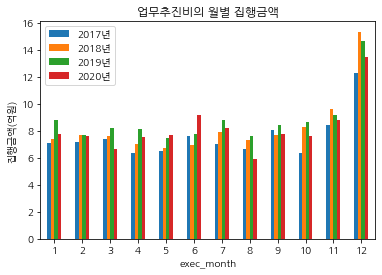

In [36]:
(year_month_total / eok_won).plot.bar(rot=0)
plt.ylabel('집행금액(억원)')
plt.title('업무추진비의 월별 집행금액')
plt.legend(['2017년', '2018년', '2019년', '2020년'])
plt.show()

12월에 항상 가장 높은 집행금액

In [38]:
# 연도와 월끼리 집행횟수 관계가 있는지 확인 (범주간 독립성 검정)
from scipy.stats import chi2_contingency

year_month_count = pd.pivot_table(data=df_expense_all, index=['exec_month'], columns=['exec_yr'], values=['exec_amount'], aggfunc='count')
year_month_count

exec_amount                  
exec_yr           2017  2018  2019  2020
exec_month                              
1                 5517  5916  6392  5282
2                 5768  5308  5562  5739
3                 6114  5792  6115  5648
4                 5408  5858  6351  5641
5                 5429  5361  5827  5566
6                 6124  5419  5599  6408
7                 5652  6199  6450  6495
8                 5654  5858  5572  4773
9                 5690  5222  5595  5310
10                5053  6444  6429  5817
11                6437  7136  6471  6368
12                7286  7705  7844  7815

In [39]:
chi2, pvalue, _, _ = chi2_contingency(year_month_count)
print(f'pvalue : {pvalue}, 검정통계량 : {chi2}')

pvalue : 1.0441894719369768e-143, 검정통계량 : 785.1315238982847


pvalue가 매우 작으므로 귀무가설(연도와 월은 독립이다) 기각 >>> 연도별 월마다 차이가 있다 & 월별로 연도마다 차이가 있다.

### 부서별 집행 내역 분석

In [40]:
dept_level1_total = pd.pivot_table(df_expense_all, index=['dept_nm_lvl_1'], values=['exec_amount'], aggfunc=sum)
dept_level1_total

,exec_amount
dept_nm_lvl_1,
사업소,8865989868
"사업소,",6449170
서울시본청,21826158045
소방재난본부(소방서),6895346543
의회사무처,1761325199


In [41]:
# 사업소, >> 사업소로 변경
df_expense_all['dept_nm_lvl_1'] = df_expense_all['dept_nm_lvl_1'].replace({'사업소,':'사업소'})

In [42]:
dept_level1_total = pd.pivot_table(df_expense_all, index=['dept_nm_lvl_1'], values=['exec_amount'], aggfunc=sum)
dept_level1_total

,exec_amount
dept_nm_lvl_1,
사업소,8872439038
서울시본청,21826158045
소방재난본부(소방서),6895346543
의회사무처,1761325199


In [43]:
dept_level2_total = pd.pivot_table(df_expense_all, index=['dept_nm_lvl_2'], values=['exec_amount'], aggfunc=sum)
dept_level2_total

,exec_amount
dept_nm_lvl_2,
119특수구조단,154656050
감사위원회,458681910
강남소방서,294361660
강동소방서,250082280
강북소방서,224225980
...,...
행정2부시장,620002048
행정국,1685525054
행정자치위원회,76298340


In [44]:
dept_level2_total_top10 = dept_level2_total.sort_values(by=['exec_amount'], ascending=False)[:10]
dept_level2_total_top10

,exec_amount
dept_nm_lvl_2,
상수도사업본부,2858871404
기획조정실,2034746588
행정국,1685525054
시민소통기획관,1131749644
서울특별시장,1123172470
도시기반시설본부,809241594
행정1부시장,807513528
정무부시장,752471802
기후환경본부,679324412


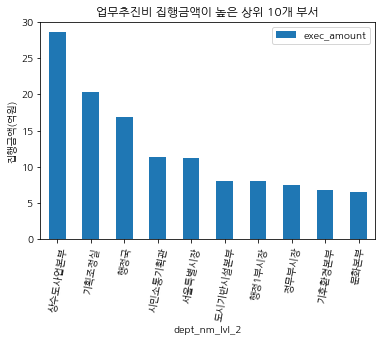

In [45]:
(dept_level2_total_top10 / eok_won).plot.bar(rot=80)
plt.ylabel('집행금액(억원)')
plt.title('업무추진비 집행금액이 높은 상위 10개 부서')
plt.show()

In [46]:
# 집행금액이 높은 상수도사업본부에 대하여 연도별 확인
df_water = df_expense_all[df_expense_all['dept_nm_lvl_2']=='상수도사업본부']
df_water.head(3)

,title,dept_nm_lvl_1,dept_nm_lvl_2,exec_yr,exec_month,dept_nm_full,exec_dt,exec_loc,exec_purpose,target_nm,payment_method,exec_amount
123,2017년 1월 상수도사업본부 급수부 업무추진비 집행내역,사업소,상수도사업본부,2017,1,급수부,2017-01-26 14:07,지수마트 (관악구 신림동),부서운영 물품(커피 등) 구입,부서운영 및 내방민원,카드,216350
124,2017년 1월 상수도사업본부 급수부 업무추진비 집행내역,사업소,상수도사업본부,2017,1,급수부,2017-01-24 14:54,직접전달,소속상근직원경조사비 지급,북부 급수운영과 홍oo,현금,50000
125,2017년 1월 상수도사업본부 급수부 업무추진비 집행내역,사업소,상수도사업본부,2017,1,급수부,2017-01-23 09:06,지수마트 (관악구 신림동),부서운영 물품(커피 등) 구입,부서운영 및 내방민원,카드,428100


In [47]:
year_water = pd.pivot_table(df_water, index=['exec_yr'], values=['exec_amount'], aggfunc=sum)
year_water

,exec_amount
exec_yr,
2017,696767529
2018,730538491
2019,729098758
2020,702466626


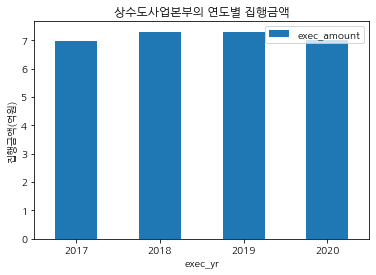

In [48]:
(year_water / eok_won).plot.bar(rot=0)
plt.ylabel('집행금액(억원)')
plt.title('상수도사업본부의 연도별 집행금액')
plt.show()

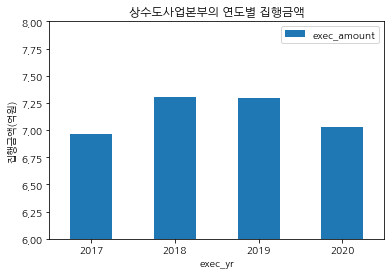

In [50]:
(year_water / eok_won).plot.bar(rot=0)
plt.ylabel('집행금액(억원)')
plt.ylim((6, 8))
plt.title('상수도사업본부의 연도별 집행금액')
plt.show()

In [51]:
# 집행부서별로 집행금액 평균이 다른지 확인
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'exec_amount ~ C(dept_nm_lvl_2)'
anova = ols(formula, df_expense_all).fit()
result = anova_lm(anova)
result

,df,sum_sq,mean_sq,F,PR(>F)
C(dept_nm_lvl_2),136.0,1.001798e+15,7.366160e+12,115.464315,0.0
Residual,286998.0,1.830932e+16,6.379599e+10,NaN,NaN


p-value가 매우 작으므로 귀무가설(부서별로 집행급액의 평균은 모두 같다) 기각 >>> 최소 한 부서는 다른 부서들과 집행급액 평균이 다르다

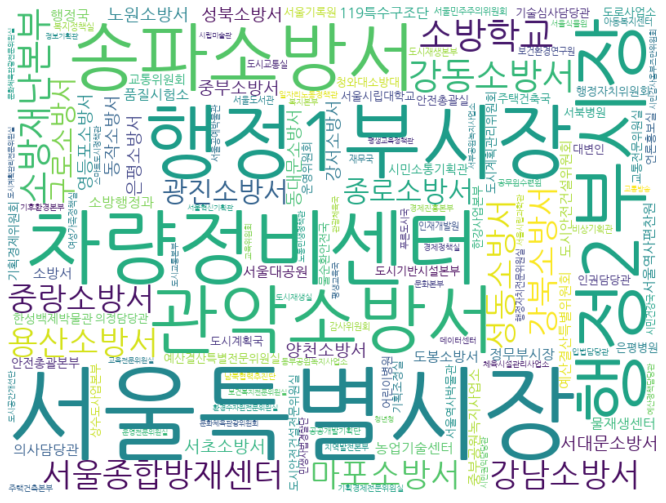

In [52]:
# 워드 클라우드로 확인
from wordcloud import WordCloud
import numpy as np

korean_font_path = r'c:\users\master\appdata\local\microsoft\windows\fonts\nanumgothic.ttf'

# 워드클라우드 이미지 생성
wc = WordCloud(font_path=korean_font_path, background_color='white', width=800, height=600)

dept_level_2_mean = pd.pivot_table(df_expense_all, index=['dept_nm_lvl_2'], values=['exec_amount'], aggfunc=np.mean)
frequencies = dept_level_2_mean['exec_amount']
wordcloud_image = wc.generate_from_frequencies(frequencies)
plt.figure(figsize=(12, 9))
plt.axis('off')
plt.imshow(wordcloud_image, interpolation='bilinear')
plt.show()

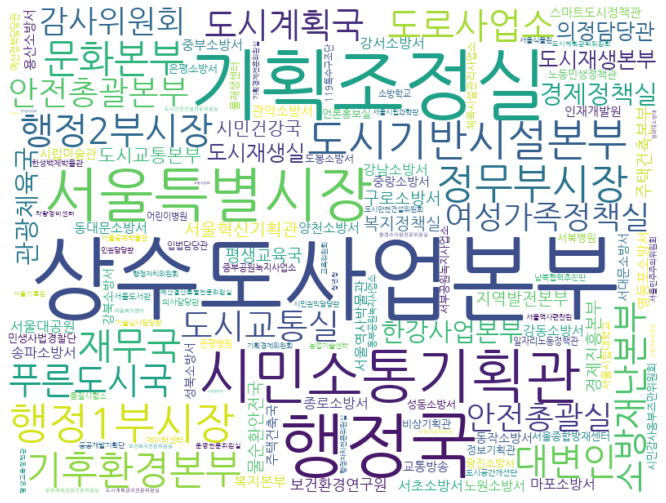

In [53]:
# 집행금액의 총합 워드클라우드
frequencies = dept_level2_total['exec_amount']
wordcloud_image = wc.generate_from_frequencies(frequencies)
plt.figure(figsize=(12, 9))
plt.axis('off')
plt.imshow(wordcloud_image, interpolation='bilinear')
plt.show()

### 요일별 및 시간대별 집행 내역 분석

In [54]:
df_expense_all['exec_dt'].values

array(['2017-01-26 13:10', '2017-01-25 22:41', '2017-01-24 12:35', ...,
       '2020-12-04 13:45', '2020-12-28 15:18', '2020-12-02 16:05'],
      dtype=object)

In [55]:
# object 타입에서 datetime으로 변환
expense_date_time = pd.to_datetime(df_expense_all['exec_dt'])
expense_date_time.values

array(['2017-01-26T13:10:00.000000000', '2017-01-25T22:41:00.000000000',
       '2017-01-24T12:35:00.000000000', ...,
       '2020-12-04T13:45:00.000000000', '2020-12-28T15:18:00.000000000',
       '2020-12-02T16:05:00.000000000'], dtype='datetime64[ns]')

In [58]:
expense_date_time[0].weekday() # 2017년 1월 26일 = 목요일

3

In [60]:
week_day_name = ['월', '화', '수', '목', '금', '토', '일']
df_expense_all['exec_wd'] = [week_day_name[weekday] for weekday in expense_date_time.dt.weekday]

In [63]:
df_expense_all['exec_wd'][0]

'목'

In [64]:
df_expense_all['exec_time'] = [hour for hour in expense_date_time.dt.hour]

In [65]:
df_expense_all.head(3)

,title,dept_nm_lvl_1,dept_nm_lvl_2,exec_yr,exec_month,dept_nm_full,exec_dt,exec_loc,exec_purpose,target_nm,payment_method,exec_amount,exec_wd,exec_time
0,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-26 13:10,동해일식 (중구 무교동),기본소득과 장애인복지 논의간담회,장애인복지정책팀장 외 2명,카드,76000,목,13
1,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-25 22:41,김앤장 (중구 무교로),장애인단체 활동지원 논의간담회,장애인복지정책과장 외 3명,카드,102000,수,22
2,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-24 12:35,왕왕생고기 (중구 을지로),장애인 기본돌봄 복지시책 논의간담회,장애인복지정책팀장외7명,카드,80000,화,12


In [66]:
# 요일별 업무추진비 집행 횟수
expense_weekday = df_expense_all['exec_wd'].value_counts()
expense_weekday

목    60370
화    58825
수    56871
금    53705
월    52746
토     2757
일     2145
Name: exec_wd, dtype: int64

In [67]:
# 요일별로 재정렬
expense_weekday = expense_weekday.reindex(index=week_day_name)
expense_weekday

월    52746
화    58825
수    56871
목    60370
금    53705
토     2757
일     2145
Name: exec_wd, dtype: int64

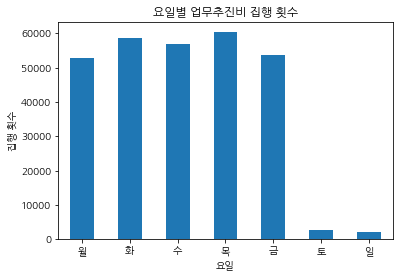

In [68]:
expense_weekday.plot.bar(rot=0)
plt.title('요일별 업무추진비 집행 횟수')
plt.xlabel('요일')
plt.ylabel('집행 횟수')
plt.show()

In [69]:
# 월~목의 평균 금액과 금~일의 평균 금액 차이가 있는지 확인
from scipy.stats import ttest_ind

weekends = ['금', '토', '일']
amount_weekdays = df_expense_all[~df_expense_all['exec_wd'].isin(weekends)]['exec_amount']
amount_weekends = df_expense_all[df_expense_all['exec_wd'].isin(weekends)]['exec_amount']

t, p = ttest_ind(amount_weekdays, amount_weekends, equal_var=False) # 분산이 같지 않다고 가정
print(f'pvalue : {p}, 검정통계량 : {t}')

pvalue : 5.57159330165274e-13, 검정통계량 : 7.211596943910947


In [70]:
t, p = ttest_ind(amount_weekdays, amount_weekends, equal_var=True) # 분산이 같다고 가정
print(f'pvalue : {p}, 검정통계량 : {t}')

pvalue : 1.6937256544215906e-12, 검정통계량 : 7.057936780758739


pvalue가 매우 작으므로 귀무가설(월\~목 평균 금액과 금\~일의 평균 금액은 같다) 기각 >>> 월\~목 평균 금액과 금\~일의 평균 금액은 다르다.

In [72]:
# 요일별 평균
amount_week_mean = df_expense_all.groupby('exec_wd')['exec_amount'].mean()
amount_week_mean

exec_wd
금    132572.778345
목    142053.325758
수    137293.904785
월    136841.356804
일    105171.353846
토    103110.630758
화    138103.596430
Name: exec_amount, dtype: float64

In [73]:
amount_week_mean = amount_week_mean.reindex(index=week_day_name)
amount_week_mean

exec_wd
월    136841.356804
화    138103.596430
수    137293.904785
목    142053.325758
금    132572.778345
토    103110.630758
일    105171.353846
Name: exec_amount, dtype: float64

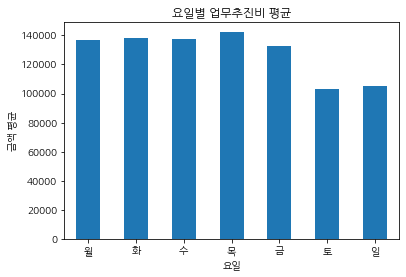

In [74]:
amount_week_mean.plot.bar(rot=0)
plt.title('요일별 업무추진비 평균')
plt.xlabel('요일')
plt.ylabel('금액 평균')
plt.show()

주말이니까 맛있는 거 먹고 힘내야지 (X)  
주말이니까 대충 먹고 때워야지 (O)  
혹은 주말이니까 인원이 적어서 금액이 적다

In [76]:
# 월~금 평균 금액 차이 있는지 확인
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'exec_amount ~ C(exec_wd)'
df_weekday = df_expense_all[~df_expense_all['exec_wd'].isin(['토', '일'])]
anova = ols(formula, df_weekday).fit()
result = anova_lm(anova)
result

,df,sum_sq,mean_sq,F,PR(>F)
C(exec_wd),4.0,2.602189e+12,6.505472e+11,9.567932,9.860010e-08
Residual,282512.0,1.920869e+16,6.799246e+10,NaN,NaN


pvalue가 작으므로 귀무가설(월\~금까지 평균 금액은 같다) 기각 >>> 월\~금 중 최소 하루는 평균 금액이 다르다. (목요일과 금요일 차이)

In [77]:
# 목, 금을 제외한 월~수만 확인
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'exec_amount ~ C(exec_wd)'
df_weekday = df_expense_all[df_expense_all['exec_wd'].isin(['월', '화', '수'])]
anova = ols(formula, df_weekday).fit()
result = anova_lm(anova)
result

,df,sum_sq,mean_sq,F,PR(>F)
C(exec_wd),2.0,4.601654e+10,2.300827e+10,0.487297,0.614286
Residual,168439.0,7.953039e+15,4.721614e+10,NaN,NaN


pvalue가 0.05보다 크므로 귀무가설(월화수의 평균 금액은 같다) 채택

In [79]:
# 주말 확인
from scipy.stats import ttest_ind

sat = df_expense_all[df_expense_all['exec_wd'] == '토']['exec_amount']
sun = df_expense_all[df_expense_all['exec_wd'] == '일']['exec_amount']

t, p = ttest_ind(sat, sun, equal_var=False)
print(f'pvalue : {p}, 검정통계량 : {t}')

pvalue : 0.60621868075435, 검정통계량 : -0.5155125048917572


In [80]:
t, p = ttest_ind(sat, sun, equal_var=True)
print(f'pvalue : {p}, 검정통계량 : {t}')

pvalue : 0.6109588368837817, 검정통계량 : -0.5087379296627051


pvalue가 0.05보다 크므로 귀무가설(토일의 평균 금액은 같다) 채택

In [81]:
# 집행 시간 분석
expense_hour_num = df_expense_all['exec_time'].value_counts()
expense_hour_num

12    118545
20     28655
13     27573
19     20695
21     15065
11     12461
14     11742
15     10000
10      7977
18      7470
16      6989
0       6269
9       4997
17      3977
22      3043
8       1141
7        481
23       144
6         52
1         46
3         29
4         27
5         21
2         20
Name: exec_time, dtype: int64

In [82]:
# 오전 8시를 기준으로 재정렬
work_hour = [ (k+8)%24 for k in range(24)]
expense_hour_num = expense_hour_num.reindex(index=work_hour)
expense_hour_num

8       1141
9       4997
10      7977
11     12461
12    118545
13     27573
14     11742
15     10000
16      6989
17      3977
18      7470
19     20695
20     28655
21     15065
22      3043
23       144
0       6269
1         46
2         20
3         29
4         27
5         21
6         52
7        481
Name: exec_time, dtype: int64

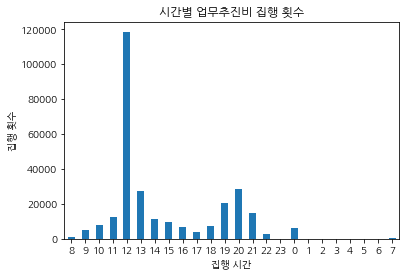

In [83]:
expense_hour_num.plot.bar(rot=0)
plt.title('시간별 업무추진비 집행 횟수')
plt.xlabel('집행 시간')
plt.ylabel('집행 횟수')
plt.show()

In [84]:
expense_hour_total = pd.pivot_table(df_expense_all, index=['exec_time'], values=['exec_amount'], aggfunc=sum)
expense_hour_total.head()

,exec_amount
exec_time,
0,1134195146
1,7259161
2,2715190
3,7671262
4,5868431


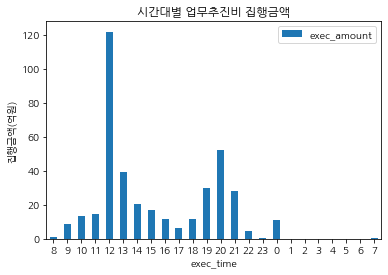

In [85]:
expense_hour_total = expense_hour_total.reindex(index=work_hour)

(expense_hour_total/eok_won).plot.bar(rot=0)
plt.ylabel('집행금액(억원)')
plt.title('시간대별 업무추진비 집행금액')
plt.show()

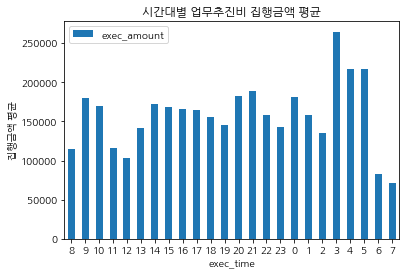

In [87]:
expense_hour_mean = pd.pivot_table(df_expense_all, index=['exec_time'], values=['exec_amount'], aggfunc=np.mean)
expense_hour_mean = expense_hour_mean.reindex(index=work_hour)

expense_hour_mean.plot.bar(rot=0)
plt.ylabel('집행금액 평균')
plt.title('시간대별 업무추진비 집행금액 평균')
plt.show()

새벽(3시~5시)에 힘드니까 더 비싼 음식을 사먹는다? >>> 데이터 수가 적어서 맞는 말인지는 모르겠다.

In [89]:
expense_hour_num[[3, 4, 5]]

3    29
4    27
5    21
Name: exec_time, dtype: int64

In [90]:
expense_hour_num[[12, 20]]

12    118545
20     28655
Name: exec_time, dtype: int64

## 머신러닝으로 예측 시도

In [1]:
import pandas as pd

data_folder = 'data/'
years = [2017, 2018, 2019, 2020]

df_expense_all = pd.DataFrame()

for year in years:
    expense_list_year_dir = data_folder + str(year) + '/'
    expense_list_tidy_file = f'{year}_expense_list_tidy.csv'
    
    path_file_name = expense_list_year_dir + expense_list_tidy_file
    df_expense = pd.read_csv(path_file_name)
    df_expense_all = df_expense_all.append(df_expense, ignore_index=True)

In [2]:
# 월별로 합쳐서 시도
df_expense_month = df_expense_all.groupby(['dept_nm_lvl_1', 'dept_nm_lvl_2', 'exec_yr', 'exec_month', 'payment_method'])[['exec_amount']].sum()
df_expense_month.head()

exec_amount
dept_nm_lvl_1 dept_nm_lvl_2 exec_yr exec_month payment_method             
사업소           공무원수련원        2017    7          카드                   282700
                            2018    3          카드                   342000
                                    4          카드                   328400
                                    10         카드                  2538960
                            2019    5          카드                   858510

In [3]:
df_expense_month.reset_index(inplace=True)
df_expense_month

,dept_nm_lvl_1,dept_nm_lvl_2,exec_yr,exec_month,payment_method,exec_amount
0,사업소,공무원수련원,2017,7,카드,282700
1,사업소,공무원수련원,2018,3,카드,342000
2,사업소,공무원수련원,2018,4,카드,328400
3,사업소,공무원수련원,2018,10,카드,2538960
4,사업소,공무원수련원,2019,5,카드,858510
...,...,...,...,...,...,...
10178,의회사무처,환경수자원전문위원실,2020,8,카드,637900
10179,의회사무처,환경수자원전문위원실,2020,9,카드,1308300
10180,의회사무처,환경수자원전문위원실,2020,10,카드,1370300
10181,의회사무처,환경수자원전문위원실,2020,11,카드,256000


In [4]:
# 라벨 인코딩
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

df_expense_month_copy = df_expense_month.copy()
df_expense_month_copy['dept_nm_lvl_1'] = lb.fit_transform(df_expense_month_copy['dept_nm_lvl_1'].values)
df_expense_month_copy['dept_nm_lvl_2'] = lb.fit_transform(df_expense_month_copy['dept_nm_lvl_2'].values)
df_expense_month_copy['payment_method'] = lb.fit_transform(df_expense_month_copy['payment_method'].values)
df_expense_month_copy

,dept_nm_lvl_1,dept_nm_lvl_2,exec_yr,exec_month,payment_method,exec_amount
0,0,9,2017,7,78,282700
1,0,9,2018,3,78,342000
2,0,9,2018,4,78,328400
3,0,9,2018,10,78,2538960
4,0,9,2019,5,78,858510
...,...,...,...,...,...,...
10178,4,136,2020,8,78,637900
10179,4,136,2020,9,78,1308300
10180,4,136,2020,10,78,1370300
10181,4,136,2020,11,78,256000


In [5]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

X = df_expense_month_copy.drop(columns=['exec_amount'])
y = df_expense_month_copy['exec_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lgbm = LGBMRegressor(importance_type='gain')
lgbm.fit(X_train, y_train)

LGBMRegressor(importance_type='gain')

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

pred = lgbm.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))
mae = mean_absolute_error(y_test, pred)

print(f'RMSE : {rmse:.4f}')
print(f'MAE : {mae:.4f}')

RMSE : 2735420.8483
MAE : 1438556.1709


In [8]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

pred = xgb.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))
mae = mean_absolute_error(y_test, pred)

print(f'RMSE : {rmse:.4f}')
print(f'MAE : {mae:.4f}')

RMSE : 2658880.2767
MAE : 1312567.4344


C:\Users\master\anaconda3\envs\multi\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [9]:
y_test.mean()

3805239.789887089

In [10]:
rmse / y_test.mean()

0.6987418463679579

예상대로 좋은 결과가 나오지 않았다...

In [11]:
# 결제 방법과 부서레벨2를 없애고 재시도
df_expense_month = df_expense_all.groupby(['dept_nm_lvl_1', 'exec_yr', 'exec_month'])[['exec_amount']].sum()
df_expense_month.head()

exec_amount
dept_nm_lvl_1 exec_yr exec_month             
사업소           2017    1             140362260
                      2             152592185
                      3             152136209
                      4             140437700
                      5             149534544

In [12]:
df_expense_month.reset_index(inplace=True)
df_expense_month.head()

,dept_nm_lvl_1,exec_yr,exec_month,exec_amount
0,사업소,2017,1,140362260
1,사업소,2017,2,152592185
2,사업소,2017,3,152136209
3,사업소,2017,4,140437700
4,사업소,2017,5,149534544


In [13]:
df_expense_month_copy = df_expense_month.copy()
df_expense_month_copy['dept_nm_lvl_1'] = lb.fit_transform(df_expense_month_copy['dept_nm_lvl_1'].values)
df_expense_month_copy.head()

,dept_nm_lvl_1,exec_yr,exec_month,exec_amount
0,0,2017,1,140362260
1,0,2017,2,152592185
2,0,2017,3,152136209
3,0,2017,4,140437700
4,0,2017,5,149534544


In [14]:
X = df_expense_month_copy.drop(columns=['exec_amount'])
y = df_expense_month_copy['exec_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lgbm = LGBMRegressor(importance_type='gain')
lgbm.fit(X_train, y_train)

pred = lgbm.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))
mae = mean_absolute_error(y_test, pred)

print(f'RMSE : {rmse:.4f}')
print(f'MAE : {mae:.4f}')

RMSE : 43100980.8515
MAE : 27388947.5047


In [15]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

pred = xgb.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))
mae = mean_absolute_error(y_test, pred)

print(f'RMSE : {rmse:.4f}')
print(f'MAE : {mae:.4f}')

RMSE : 35618014.0552
MAE : 23409978.9000


C:\Users\master\anaconda3\envs\multi\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [16]:
y_test.mean()

202966247.675

In [17]:
rmse / y_test.mean()

0.17548737518309254

평균에 비하여 매우 낮은 값이 나왔다! >>> 결제 방법 혹은 부서레벨2는 좋지 않은 feature

In [20]:
# 요일을 추가하고 재시도
df_expense_all['exec_wd'] = pd.to_datetime(df_expense_all['exec_dt']).dt.weekday

df_expense_month = df_expense_all.groupby(['dept_nm_lvl_1', 'dept_nm_lvl_2', 'exec_yr', 'exec_month', 'payment_method', 'exec_wd'])[['exec_amount']].sum()
df_expense_month.reset_index(inplace=True)
df_expense_month.head()

,dept_nm_lvl_1,dept_nm_lvl_2,exec_yr,exec_month,payment_method,exec_wd,exec_amount
0,사업소,공무원수련원,2017,7,카드,2,162700
1,사업소,공무원수련원,2017,7,카드,4,120000
2,사업소,공무원수련원,2018,3,카드,0,130500
3,사업소,공무원수련원,2018,3,카드,3,211500
4,사업소,공무원수련원,2018,4,카드,0,268000


In [21]:
df_expense_month_copy = df_expense_month.copy()
df_expense_month_copy['dept_nm_lvl_1'] = lb.fit_transform(df_expense_month_copy['dept_nm_lvl_1'].values)
df_expense_month_copy['dept_nm_lvl_2'] = lb.fit_transform(df_expense_month_copy['dept_nm_lvl_2'].values)
df_expense_month_copy['payment_method'] = lb.fit_transform(df_expense_month_copy['payment_method'].values)
df_expense_month_copy

,dept_nm_lvl_1,dept_nm_lvl_2,exec_yr,exec_month,payment_method,exec_wd,exec_amount
0,0,9,2017,7,78,2,162700
1,0,9,2017,7,78,4,120000
2,0,9,2018,3,78,0,130500
3,0,9,2018,3,78,3,211500
4,0,9,2018,4,78,0,268000
...,...,...,...,...,...,...,...
39760,4,136,2020,12,78,0,383000
39761,4,136,2020,12,78,1,377300
39762,4,136,2020,12,78,2,861900
39763,4,136,2020,12,78,3,603100


In [22]:
X = df_expense_month_copy.drop(columns=['exec_amount'])
y = df_expense_month_copy['exec_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lgbm = LGBMRegressor(importance_type='gain')
lgbm.fit(X_train, y_train)

pred = lgbm.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))
mae = mean_absolute_error(y_test, pred)

print(f'RMSE : {rmse:.4f}')
print(f'MAE : {mae:.4f}')

RMSE : 903647.8535
MAE : 455785.3242


In [23]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

pred = xgb.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))
mae = mean_absolute_error(y_test, pred)

print(f'RMSE : {rmse:.4f}')
print(f'MAE : {mae:.4f}')

RMSE : 907929.3958
MAE : 446392.5857


C:\Users\master\anaconda3\envs\multi\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [24]:
y_test.mean()

960120.373192506

In [25]:
rmse / y_test.mean()

0.9456412144819232

가장 좋지 않은 결과가 나왔다.

In [26]:
# 결제 방법 대신 요일만 추가
df_expense_month = df_expense_all.groupby(['dept_nm_lvl_1', 'dept_nm_lvl_2', 'exec_yr', 'exec_month', 'exec_wd'])[['exec_amount']].sum()
df_expense_month.reset_index(inplace=True)

df_expense_month_copy = df_expense_month.copy()
df_expense_month_copy['dept_nm_lvl_1'] = lb.fit_transform(df_expense_month_copy['dept_nm_lvl_1'].values)
df_expense_month_copy['dept_nm_lvl_2'] = lb.fit_transform(df_expense_month_copy['dept_nm_lvl_2'].values)
df_expense_month_copy

,dept_nm_lvl_1,dept_nm_lvl_2,exec_yr,exec_month,exec_wd,exec_amount
0,0,9,2017,7,2,162700
1,0,9,2017,7,4,120000
2,0,9,2018,3,0,130500
3,0,9,2018,3,3,211500
4,0,9,2018,4,0,268000
...,...,...,...,...,...,...
28688,4,136,2020,12,0,383000
28689,4,136,2020,12,1,377300
28690,4,136,2020,12,2,861900
28691,4,136,2020,12,3,603100


In [27]:
X = df_expense_month_copy.drop(columns=['exec_amount'])
y = df_expense_month_copy['exec_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lgbm = LGBMRegressor(importance_type='gain')
lgbm.fit(X_train, y_train)

pred = lgbm.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))
mae = mean_absolute_error(y_test, pred)

print(f'RMSE : {rmse:.4f}')
print(f'MAE : {mae:.4f}')

RMSE : 1089104.7653
MAE : 523926.1947


In [28]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

pred = xgb.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))
mae = mean_absolute_error(y_test, pred)

print(f'RMSE : {rmse:.4f}')
print(f'MAE : {mae:.4f}')

RMSE : 1112678.7407
MAE : 510372.4740


C:\Users\master\anaconda3\envs\multi\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [29]:
y_test.mean()

1351180.4849276878

In [30]:
rmse / y_test.mean()

0.823486390714774

마찬가지로 매우 좋지 않은 결과가 나왔다 >>> 요일은 좋지 않은 feature